In [1]:
#Import necessary libraries
import warnings
warnings.filterwarnings('ignore')


import pandas as pd 

# Matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
plt.style.use('fivethirtyeight')

from fbprophet import Prophet as proph

In [32]:
data=pd.read_excel('US Data.xlsx')
ts=data[['Date','Last Price']]
ts.rename(columns={'Date': 'ds', 'Last Price': 'y'}, inplace=True)
train=int(len(ts)*0.9)
train_data=ts[:train]
test_data=ts[train:]
test_dates=test_data.drop('y',axis=1)
test_y=test_data.y
test_dates.head()

,ds
1242,2019-01-09
1243,2019-01-10
1244,2019-01-11
1245,2019-01-14
1246,2019-01-15


In [10]:
model = proph(interval_width=0.95)
model.fit(train_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
future_data = model.make_future_dataframe(periods=365)  
future_data.tail()

,ds
1602,2020-01-04
1603,2020-01-05
1604,2020-01-06
1605,2020-01-07
1606,2020-01-08


In [33]:
forecast=model.predict(test_dates)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-09,202.577144,176.866644,208.964316,202.577144,202.577144,-10.113100,-10.113100,-10.113100,0.161662,0.161662,0.161662,-10.274762,-10.274762,-10.274762,0.0,0.0,0.0,192.464044
1,2019-01-10,202.653083,175.884865,210.497484,202.653083,202.653083,-9.947686,-9.947686,-9.947686,-0.135397,-0.135397,-0.135397,-9.812289,-9.812289,-9.812289,0.0,0.0,0.0,192.705397
2,2019-01-11,202.729022,175.282406,209.267526,202.729022,202.729022,-9.664815,-9.664815,-9.664815,-0.312173,-0.312173,-0.312173,-9.352642,-9.352642,-9.352642,0.0,0.0,0.0,193.064207
3,2019-01-14,202.956839,176.390868,211.141905,202.914774,202.962867,-8.472547,-8.472547,-8.472547,-0.409580,-0.409580,-0.409580,-8.062967,-8.062967,-8.062967,0.0,0.0,0.0,194.484292
4,2019-01-15,203.032778,177.537917,213.231506,202.973368,203.051164,-7.565672,-7.565672,-7.565672,0.117751,0.117751,0.117751,-7.683424,-7.683424,-7.683424,0.0,0.0,0.0,195.467106


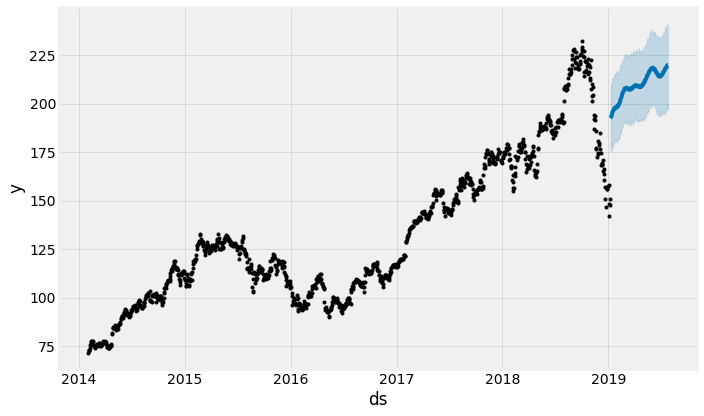

In [39]:
model.plot(forecast, uncertainty=True)
plt.show()

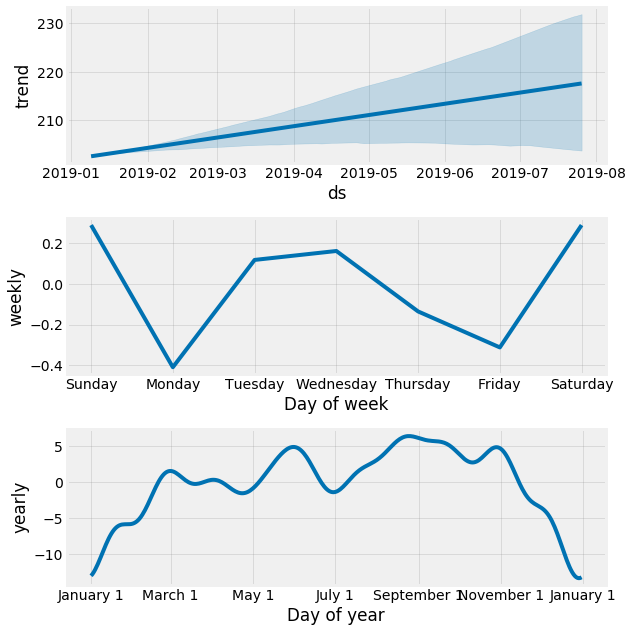

In [55]:
model.plot_components(forecast)
plt.show()

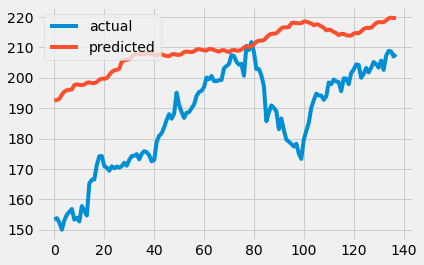

MSE of prophet forecast is:  671.6116602215176


In [60]:
plt.plot(test_y.reset_index().y, label='actual')
plt.plot(forecast.yhat, label='predicted')
plt.legend(loc='upper left')
plt.show()

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test_y, forecast.yhat)
print ('MSE of prophet forecast is: ', mse)